# Intro to Machine Learning
## Logistic Regression 

- Two types of data
    - labeled data: used for Regression and classification
    - use when data has a variable that you are trying to predict (predicting an outcome of a game)
    <br> <br>
    - un-labeled data: used for clustering
    - use when data does not have a variable that it is trying to predict (AI trying to learn voice)

## ML algorithms fall into three main categories 

- Regressors: using labeled data, to predict numerical value
    - ex: predicting value of a house on dollars <br> <br>
    
- Classifiers: using labeled data, predicts a discrete class label
    - ex: predict of cancer or not, predicting what type of animal is in the image
    <br> <br>
- Clusterers: using unlabeled data, labels discrete clusters within a data set. Great when you aren't able to generate labels
    - ex: identify what type of customers you have 

## Logistic Regression- a classifier

- Logistic Reggression (Logit): classification machine learning algorithm. Uses labeled data to predict a discrete outcome by assigning a predicted probability to each decision. 
    - LR separates the input into "regions" by a linear boundary
    - sigmoid function is used to separate the data into two areas

## Classification threshold

- A threshold(linear boundary) is placed to determine whether the classification is a yes or no (above or below

- for example weight. A threshold is place to determine obesity. If weight(data) is above the threshold, obese. if below the threshold, not obese. 

## Wrong classifications

- false postive: labeled as true when in reality, it is false
    - ex: classifier is obese, but the truth that it is not obese
<br> <br> 

- false negative: labeled as false, but in reality, it is true
    - ex: labeled as not obese, but truth is obese
   

## Logistic Regression Pros and Cons
- Pros: 
    - less prone to over-fitting compared to other classifiers
    - computationally easy to train and predict values
    - describes relationship between independent variables and dependent variables

- Cons:
    - main problem, the assumption of linearity between the dependent variable and the independent variables
    - if more columns than rows (if number of observations are lesser than the number of features), LR should not be used, it may lead to overfit

## Evaluation Terms for classifiers: 

- True negative, True Postive, False negative, False postive
<br> <br> 
- The first term (True or False) is if the prediction was correct or not. True means correct, false means incorrect
<br> <br>

- the second term (postive or negative) is what the classifier guessed. Did it say it yes or did it say no 

## Evaluation metrics for classifiers

Meterics that tell us how our model is performing

- The four metrics: Accuracy, Precision, Recall, F1 Score

<br> 

- Accuracy: great starter. The count of all predictions you got correct divided by the total number of predictions (Percent of predictions we got correct) 
    - Accuracy = (TP + TN) / (TP + TN + FP + FN) 
    - Accuracy = # of correct predictions / all predictions
    
<br>

- Recall: true positive rate (sensitivity). How many times was the Yes called correctly. Pefect score is 1.0, as it goes down, the score goes down
    - false negative is looked here. 

<br>

- Precision: What proportion of positive idenifications was actualy correct? Out of all the times our model says "Yes", what percentage was it correct. 
    - perfect score is 1.0, a model produces no false positives has a precision of 1.0
    - precision = TP/ (TP + FP) 
    
- F1 score: harmonic mean of precision and recall. Good overall evaluation metric.
    - F1 score a weighted average of the precision and recall. Best at 1, worst at 0
    - F1 = 2 * (precision * recall) / (precision + recall) 

## ISBE: the main steps when building a Machine Learning model

1) I- Inspect and explore data <br>
2) S- Select and engineer features <br>
3) B- Build and train model <br>
4) E- evaluate model <br>

In [1]:
# pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# seaborn/ matplotlib for visualiation
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
%matplotlib inline 

# helper function to split our data 
from sklearn.model_selection import train_test_split

# this is our logit model
from sklearn.linear_model import LogisticRegression

# helper functions to evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [2]:
# load data 

df = pd.read_csv("data/titanic.csv")

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# bring up new data
# inspect and explore EDA (Exploratory Data Analysis

## Inspect and Explore EDA
1. Shape and size 
2. Describe 
3. Info
4. check for nulls
5. check for dupes 
6. plot

In [4]:
#1. shape and size
df.shape 

# 891 rows, 12 columns

(891, 12)

In [6]:
# 2. describe
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 3. get info on cols 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 4. check for nulls
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [9]:
# drop the nulls 
df = df.dropna() # let us not drop the nulls, too many nulls

In [10]:
df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [13]:
# 5. check for dupes 
df.duplicated().sum() # no dupes

0

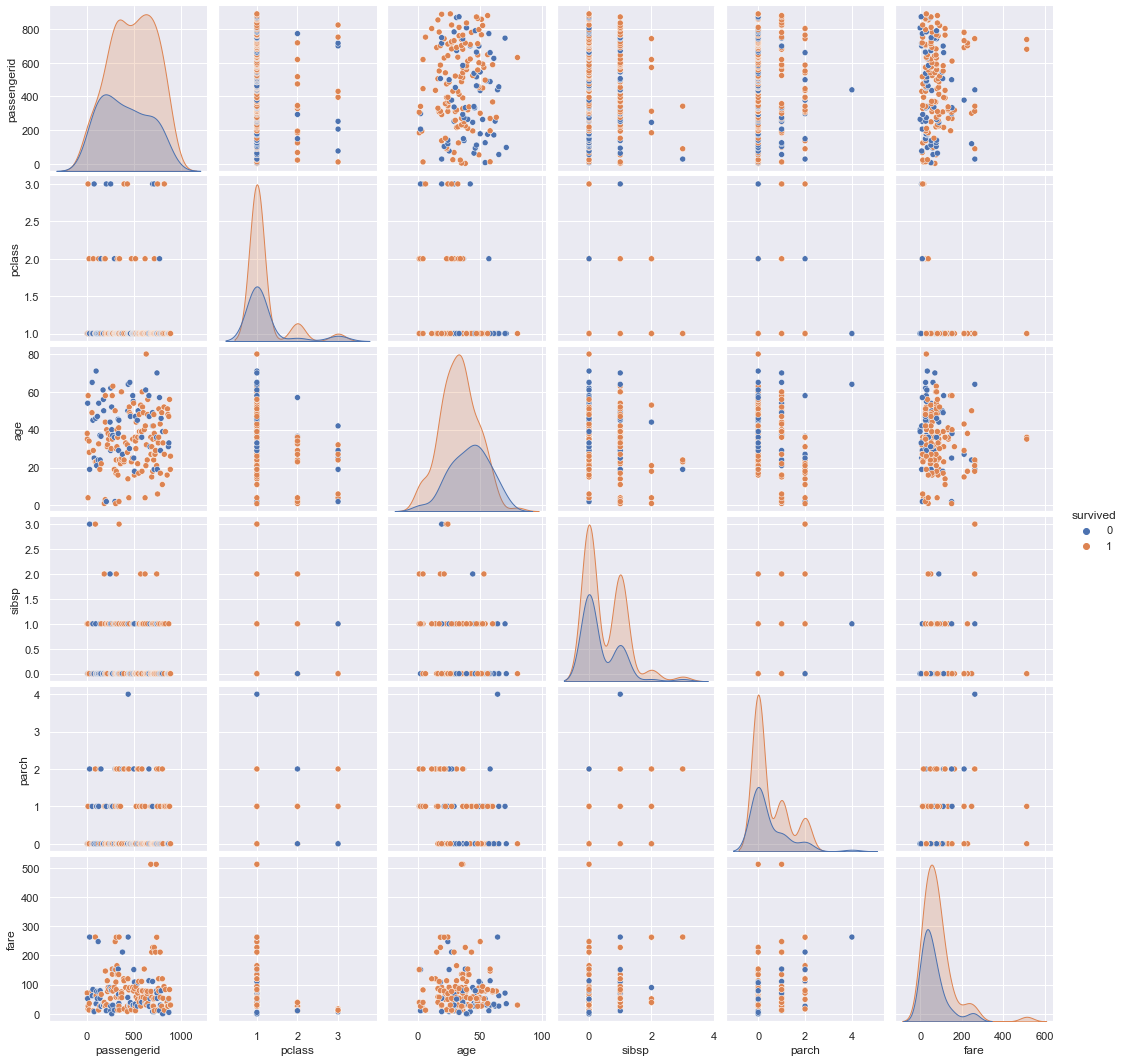

In [16]:
#6. plot the data
# visualize the data

sns.pairplot(df, hue = "survived") # hue is the grouping variable, divides the different points by color 

In [17]:
# checking the number of total siblings (using groupby)
gb = df.groupby("sibsp")
gb["sibsp"].agg(["count"])

,count
sibsp,
0,110
1,64
2,6
3,3


In [19]:
df.shape

(183, 12)